#install

In [ ]:
%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express
!pip install Shapely
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-e6ppn7l4
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-e6ppn7l4
CPU times: user 362 ms, sys: 104 ms, total: 466 ms
Wall time: 35.4 s


In [ ]:
from shapely.geometry import Point,Polygon
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt 
import folium
from folium import plugins
from folium.plugins import HeatMap
import plotly_express as px
from google.colab import drive
from IPython.display import display
import glob
import re
import plotly_express as px
import seaborn as sns
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#read

In [ ]:
!ls '/content/drive/My Drive/2021 Route Prediction/Project-1/Source-Code/data/gps_log_2019-04-week-1'

'/content/drive/My Drive/2021 Route Prediction/Project-1/Source-Code/data/gps_log_2019-04-week-1'


In [ ]:
gps_week_1 = pd.read_csv('/content/drive/My Drive/2021 Route Prediction/Project-1/Source-Code/data/gps_log_2019-04-week-1')

#Plot

In [ ]:
gps_week_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37960355 entries, 0 to 37960354
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   time_stamp  object 
 1   unit_id     object 
 2   lat         float64
 3   lon         float64
 4   speed       int64  
 5   unit_type   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.7+ GB


In [ ]:
car_day = gps_week_1[['time_stamp']]

In [ ]:
car_day = car_day[['time_stamp']].astype("datetime64")

In [ ]:
car_day_count = car_day.groupby(car_day['time_stamp'].dt.day).count()

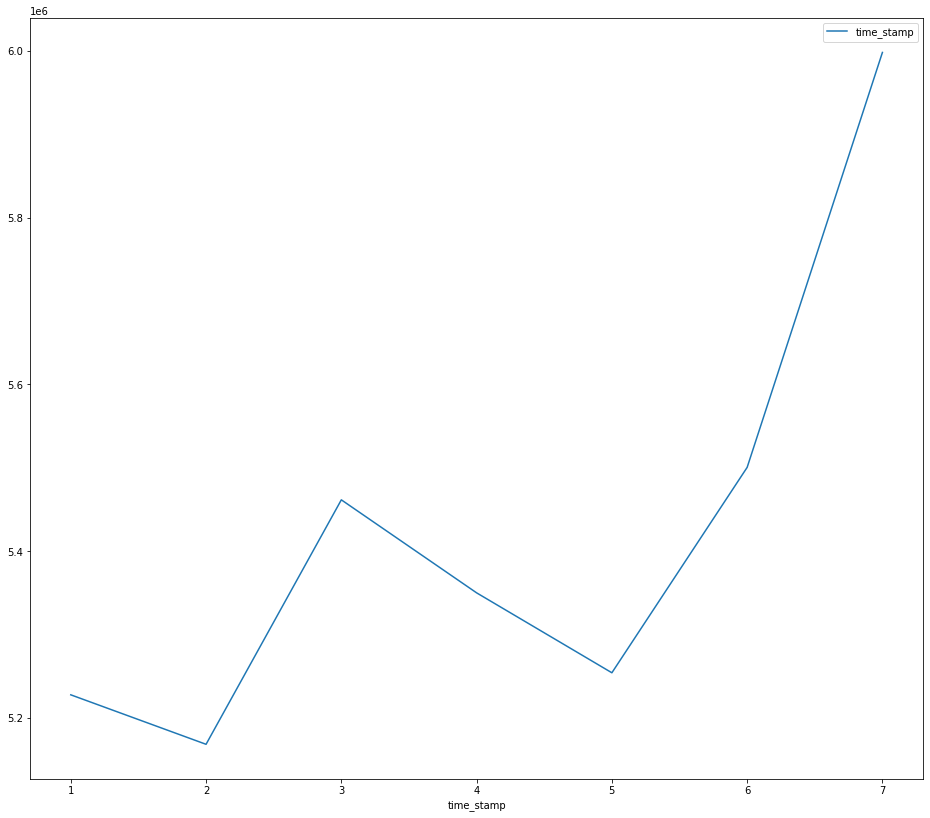

In [ ]:
car_day_count.plot(figsize=(16,14))

In [ ]:
car = gps_week_1[['unit_id']]

In [ ]:
veh_count = car.unit_id.value_counts()

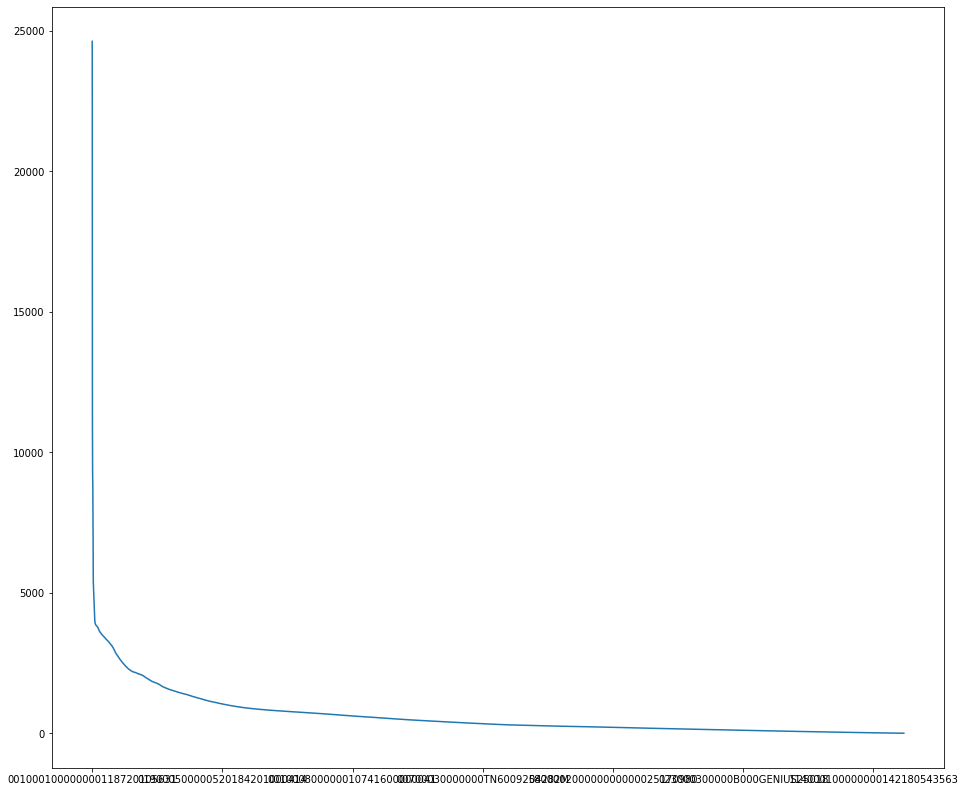

In [ ]:
veh_count.plot(figsize=(16,14))

TypeError: ignored

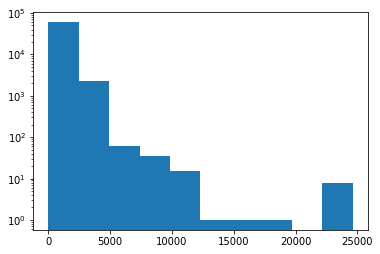

In [ ]:
plt.hist(veh_count,log=True)
plt.show()

In [ ]:
car_hour = gps_week_1[['time_stamp','unit_id']]

In [ ]:
car_hour = car_hour[['time_stamp']].astype("datetime64")

In [ ]:
car_hour['unit_id'] = gps_week_1[['unit_id']]

In [ ]:
car_hour

,time_stamp,unit_id
0,2019-04-01 00:00:34,06500030000000AXIS180630006
1,2019-04-01 00:00:34,06500030000000AXIS180630006
2,2019-04-01 00:00:15,06500030000000AXIS180825016
3,2019-04-01 00:00:08,006000600000000000001302517
4,2019-04-01 00:00:40,017000200000863835024545415
...,...,...
37960350,2019-04-07 23:59:59,013000100000868998032674141
37960351,2019-04-07 23:59:59,054000200000000142180544066
37960352,2019-04-07 23:59:59,054000200000000142180544066
37960353,2019-04-07 23:59:59,043000300000863835024875978


In [ ]:
c = car_hour.loc[car_hour['unit_id'] == '005000800000868998030032979']
c = c.loc[c['time_stamp'] < pd.Timestamp(2019, 4, 2)]

In [ ]:
x = c['time_stamp'].max() - c['time_stamp'].min()
x.total_seconds()

81276.0

In [ ]:
i = 0;
df_day_1 = pd.DataFrame(columns=['id', 'time'])
for car in car_hour.unit_id.unique():
  c = car_hour.loc[car_hour['unit_id'] == car]
  c = c.loc[c['time_stamp'] < pd.Timestamp(2019, 4, 2)]
  hour =  c['time_stamp'].max() - c['time_stamp'].min()
  df_day_1.loc[i] = [car,hour.total_seconds()]
  i = i+1
print("complet")

KeyboardInterrupt: ignored

In [ ]:
df_day_1

,id,time
0,06500030000000AXIS180630006,86039.0
1,06500030000000AXIS180825016,79746.0
2,006000600000000000001302517,85274.0
3,017000200000863835024545415,85586.0
4,022000200000000000020088297,77417.0
...,...,...
5667,08800010000000000F_S-N40172,86114.0
5668,0790003AT073864507034522523,85006.0
5669,001000800000010920700000004,85410.0
5670,14200020000000SW30019050705,85555.0


In [ ]:
df_day_1['time'] = df_day_1[['time']] / 3600

In [ ]:
df_day_1

,id,time
0,06500030000000AXIS180630006,23.899722
1,06500030000000AXIS180825016,22.151667
2,006000600000000000001302517,23.687222
3,017000200000863835024545415,23.773889
4,022000200000000000020088297,21.504722
...,...,...
5667,08800010000000000F_S-N40172,23.920556
5668,0790003AT073864507034522523,23.612778
5669,001000800000010920700000004,23.725000
5670,14200020000000SW30019050705,23.765278


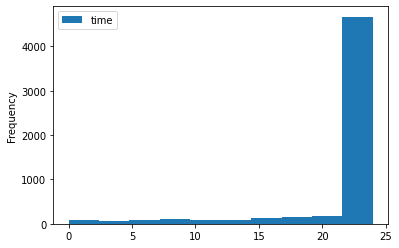

In [ ]:
df_day_1.plot.hist()